# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Objective: 
### <span style='font-family:"Times New Roman"'>In this problem, histogram equalization problem and its effect on images is considered. For each equalized histogram, a transform function is calculated. The results of written function are comapred with `exposure` function.  

# <span style='font-family:"Times New Roman"'>Loading required modules:

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure

# <span style='font-family:"Times New Roman"'>Defining Function:

In [2]:
def Histeq(image, number_bins=256):   #Histogram Equalization Function

    imhist, bins = np.histogram(image.flatten(), number_bins, density=True)
    s_k = imhist.cumsum()                                # cumulative distribution function
    T = 255 * s_k / s_k[-1]                              # normalizing 

    imeq = np.interp(image.flatten(), bins[:-1], T)      #Finding new pixel values

    return imeq.reshape(image.shape), T

In [3]:
def find_transformation(I,J):         #Calculating Transfer Function
    h, _ = np.histogram(I,bins=256,range=(0,255))
    T = np.zeros(h.astype(float).shape)
    for k in range(256):
        if h[k] != 0:
            T[k] = J[I==k].max()
        else:
            T[k] = T[k-1]
    return T

# <span style='font-family:"Times New Roman"'>Loading images: 

In [4]:
Idark = mpimg.imread('pollen_dark.tif')
Ihighcontrast = mpimg.imread('pollen_highcontrast.tif')
Ilight = mpimg.imread('pollen_light.tif')
Ilowcontrast = mpimg.imread('pollen_lowcontrast.tif')

# <span style='font-family:"Times New Roman"'>Equalizing images and getting transfer functions:

In [5]:
Heqdark , Tdark = Histeq(Idark)
Heqhighcontrast , Thighcontrast = Histeq(Ihighcontrast)
Heqlight , Tlight = Histeq(Ilight)
Heqlowcontrast , Tlowcontrast = Histeq(Ilowcontrast)

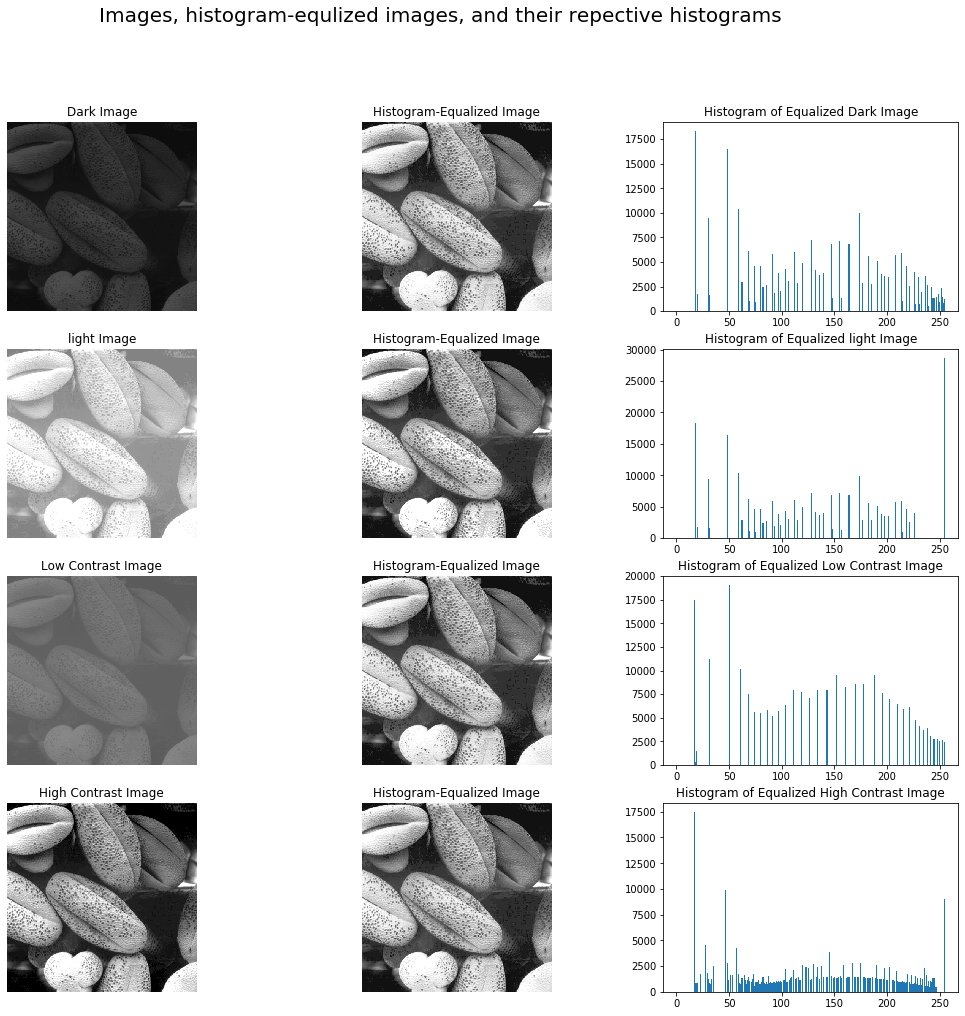

In [6]:
fig = plt.figure(figsize=(18, 16))
plt.subplot(4, 3, 1)
plt.imshow(Idark,cmap='gray',vmin=0, vmax=255)
plt.title('Dark Image')
plt.axis('off')
plt.subplot(4, 3, 2)
plt.imshow(Heqdark,cmap='gray',vmin=0, vmax=255)
plt.title('Histogram-Equalized Image')
plt.axis('off')
plt.subplot(4, 3, 3)
plt.hist(Heqdark.flatten(),bins=256,range=(0,255))
plt.title('Histogram of Equalized Dark Image')
plt.subplot(4, 3, 4)
plt.imshow(Ilight,cmap='gray',vmin=0, vmax=255)
plt.title('light Image')
plt.axis('off')
plt.subplot(4, 3, 5)
plt.imshow(Heqlight,cmap='gray',vmin=0, vmax=255)
plt.title('Histogram-Equalized Image')
plt.axis('off')
plt.subplot(4, 3, 6)
plt.hist(Heqlight.flatten(),bins=256,range=(0,255))
plt.title('Histogram of Equalized light Image')
plt.subplot(4, 3, 7)
plt.imshow(Ilowcontrast,cmap='gray',vmin=0, vmax=255)
plt.title('Low Contrast Image')
plt.axis('off')
plt.subplot(4, 3, 8)
plt.imshow(Heqlowcontrast,cmap='gray',vmin=0, vmax=255)
plt.title('Histogram-Equalized Image')
plt.axis('off')
plt.subplot(4, 3, 9)
plt.hist(Heqlowcontrast.flatten(),bins=256,range=(0,255))
plt.title('Histogram of Equalized Low Contrast Image')
plt.subplot(4, 3, 10)
plt.imshow(Ihighcontrast,cmap='gray',vmin=0, vmax=255)
plt.title('High Contrast Image')
plt.axis('off')
plt.subplot(4, 3, 11)
plt.imshow(Heqhighcontrast,cmap='gray',vmin=0, vmax=255)
plt.title('Histogram-Equalized Image')
plt.axis('off')
plt.subplot(4, 3, 12)
plt.hist(Heqhighcontrast.flatten(),bins=256,range=(0,255))
plt.title('Histogram of Equalized High Contrast Image')
fig.suptitle('Images, histogram-equlized images, and their repective histograms', fontsize = 20)
plt.show()

# <span style='font-family:"Times New Roman"'> Preparing transfer functions for plotting: 

In [7]:
TFdark =[(np.linspace(np.amin(Idark), np.amax(Idark), 256)), Tdark]
TFlight = [(np.linspace(np.amin(Ilight), np.amax(Ilight), 256)), Tlight]
TFlowcontrast = [(np.linspace(np.amin(Ilowcontrast), np.amax(Ilowcontrast), 256)), Tlowcontrast]
TFhighcontrast = [(np.linspace(np.amin(Ihighcontrast), np.amax(Ihighcontrast), 256)), Thighcontrast]
TFdark = np.append(np.array([[np.amin(Idark)],[0]]), TFdark, axis=1)
TFlight = np.append(np.array([[np.amin(Ilight)],[0]]), TFlight, axis=1)
TFlowcontrast = np.append(np.array([[np.amin(Ilowcontrast)],[0]]), TFlowcontrast, axis=1)

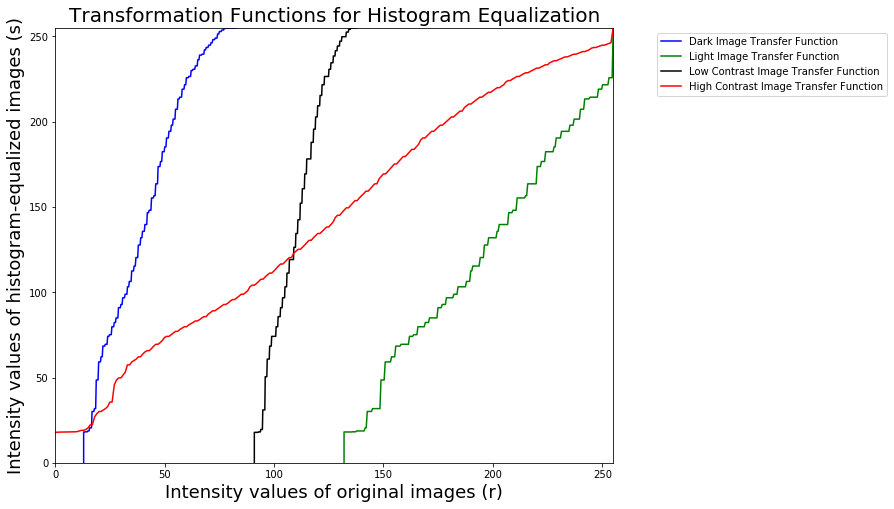

In [8]:
fig = plt.figure(figsize=(10, 8))

plt.plot(TFdark[0],TFdark[1],c='b',label="Dark Image Transfer Function")
plt.plot(TFlight[0],TFlight[1],c='g',label="Light Image Transfer Function")
plt.plot(TFlowcontrast[0],TFlowcontrast[1],c='k',label="Low Contrast Image Transfer Function")
plt.plot(TFhighcontrast[0],TFhighcontrast[1],c='r',label="High Contrast Image Transfer Function")

plt.xlim((0,255))
plt.ylim((0,255))
plt.xlabel('Intensity values of original images (r)', fontsize=18)
plt.ylabel('Intensity values of histogram-equalized images (s)', fontsize=18)
plt.title('Transformation Functions for Histogram Equalization', fontsize = 20)
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right', ncol=1)


plt.show()

# <span style='font-family:"Times New Roman"'> Equalizing images using exposure.equalize_hist

In [9]:
Heqdark = exposure.equalize_hist(Idark)
Heqdark = exposure.rescale_intensity(Heqdark, out_range=(0, 255))
Heqhighcontrast  = exposure.equalize_hist(Ihighcontrast)
Heqhighcontrast = exposure.rescale_intensity(Heqhighcontrast, out_range=(0, 255))
Heqlight = exposure.equalize_hist(Ilight)
Heqlight = exposure.rescale_intensity(Heqlight, out_range=(0, 255))
Heqlowcontrast = exposure.equalize_hist(Ilowcontrast)
Heqlowcontrast = exposure.rescale_intensity(Heqlowcontrast, out_range=(0, 255))

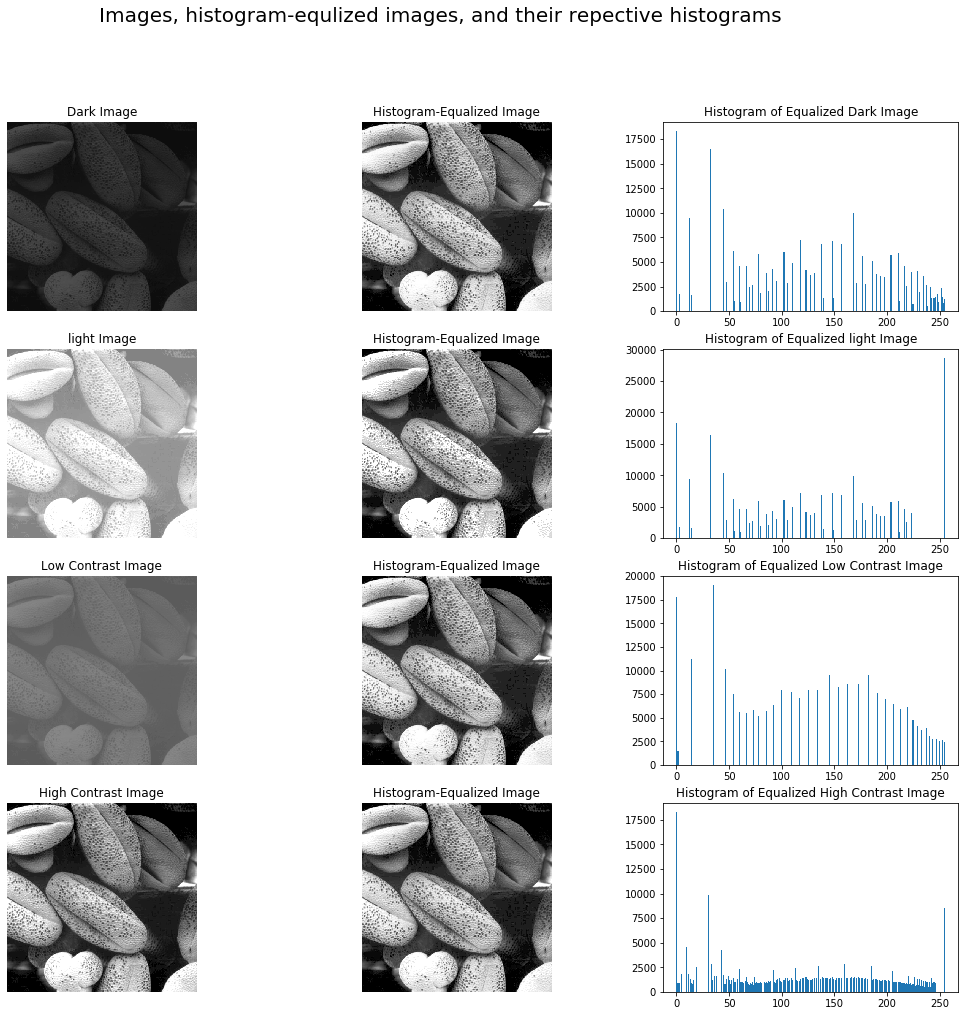

In [10]:
fig = plt.figure(figsize=(18, 16))
plt.subplot(4, 3, 1)
plt.imshow(Idark,cmap='gray',vmin=0, vmax=255)
plt.title('Dark Image')
plt.axis('off')
plt.subplot(4, 3, 2)
plt.imshow(Heqdark,cmap='gray')
plt.title('Histogram-Equalized Image')
plt.axis('off')
plt.subplot(4, 3, 3)
plt.hist(Heqdark.flatten(),bins=256,range=(0,255))
plt.title('Histogram of Equalized Dark Image')
plt.subplot(4, 3, 4)
plt.imshow(Ilight,cmap='gray',vmin=0, vmax=255)
plt.title('light Image')
plt.axis('off')
plt.subplot(4, 3, 5)
plt.imshow(Heqlight,cmap='gray',vmin=0, vmax=255)
plt.title('Histogram-Equalized Image')
plt.axis('off')
plt.subplot(4, 3, 6)
plt.hist(Heqlight.flatten(),bins=256,range=(0,255))
plt.title('Histogram of Equalized light Image')
plt.subplot(4, 3, 7)
plt.imshow(Ilowcontrast,cmap='gray',vmin=0, vmax=255)
plt.title('Low Contrast Image')
plt.axis('off')
plt.subplot(4, 3, 8)
plt.imshow(Heqlowcontrast,cmap='gray',vmin=0, vmax=255)
plt.title('Histogram-Equalized Image')
plt.axis('off')
plt.subplot(4, 3, 9)
plt.hist(Heqlowcontrast.flatten(),bins=256,range=(0,255))
plt.title('Histogram of Equalized Low Contrast Image')
plt.subplot(4, 3, 10)
plt.imshow(Ihighcontrast,cmap='gray',vmin=0, vmax=255)
plt.title('High Contrast Image')
plt.axis('off')
plt.subplot(4, 3, 11)
plt.imshow(Heqhighcontrast,cmap='gray',vmin=0, vmax=255)
plt.title('Histogram-Equalized Image')
plt.axis('off')
plt.subplot(4, 3, 12)
plt.hist(Heqhighcontrast.flatten(),bins=256,range=(0,255))
plt.title('Histogram of Equalized High Contrast Image')
fig.suptitle('Images, histogram-equlized images, and their repective histograms', fontsize = 20)
plt.show()

In [11]:
Heqdark = exposure.equalize_hist(Idark)
Heqhighcontrast  = exposure.equalize_hist(Ihighcontrast)
Heqlight = exposure.equalize_hist(Ilight)
Heqlowcontrast = exposure.equalize_hist(Ilowcontrast)

In [12]:
Tdark =[]
Tlight = []
Tlowcontrast = []
Thighcontrast = []
TFdark =[]
TFlight = []
TFlowcontrast = []
TFhighcontrast = []

In [13]:
Tdark =find_transformation(Idark,Heqdark)
Tlight = find_transformation(Ilight,Heqlight)
Tlowcontrast = find_transformation(Ilowcontrast,Heqlowcontrast)
Thighcontrast = find_transformation(Ihighcontrast,Heqhighcontrast)

In [14]:
TFdark =[(np.linspace(0, 255, 256)), Tdark]
TFlight = [(np.linspace(0, 255, 256)), Tlight]
TFlowcontrast = [(np.linspace(0, 255, 256)), Tlowcontrast]
TFhighcontrast = [(np.linspace(0, 255, 256)), Thighcontrast]

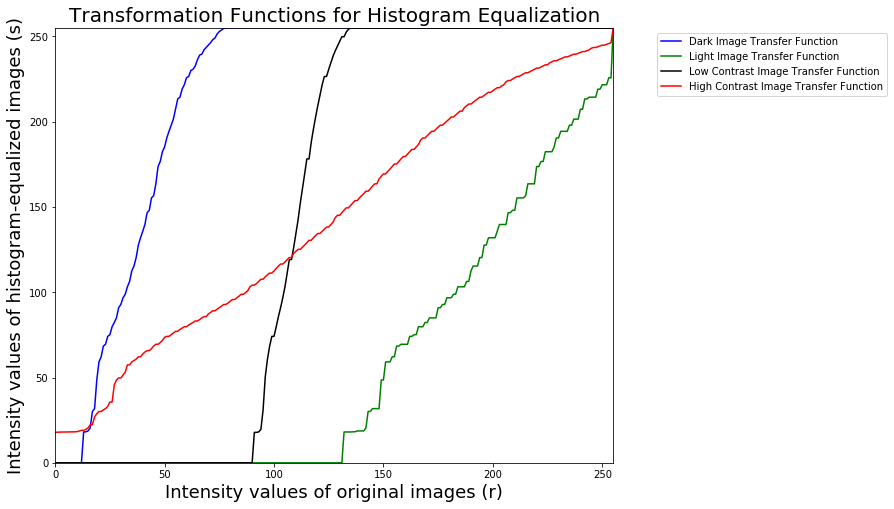

In [15]:
fig = plt.figure(figsize=(10, 8))

plt.plot(TFdark[0],TFdark[1]*255,c='b',label="Dark Image Transfer Function")
plt.plot(TFlight[0],TFlight[1]*255,c='g',label="Light Image Transfer Function")
plt.plot(TFlowcontrast[0],TFlowcontrast[1]*255,c='k',label="Low Contrast Image Transfer Function")
plt.plot(TFhighcontrast[0],TFhighcontrast[1]*255,c='r',label="High Contrast Image Transfer Function")

plt.xlim((0,255))
plt.ylim((0,255))
plt.xlabel('Intensity values of original images (r)', fontsize=18)
plt.ylabel('Intensity values of histogram-equalized images (s)', fontsize=18)
plt.title('Transformation Functions for Histogram Equalization', fontsize = 20)
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right', ncol=1)


plt.show()